##### Megjegyzés:
Nyomtatásban, elektronikus kidolgozásban a mérnöki konszenzus szerint a **mátrixokat álló, vastag nagybetűvel**, míg a **vektorokat álló, vastag betűvel** jelöljük (a megegyezés szerint inkább kisbetűvel, ám ez számos helyen eltér) a kézi kidolgozásban ismert aláhúzás helyett, továbbá minden ismeretlent/paramétert dőlt betűvel. A geometriai pontok, valamint a mértékegységek jelölése álló betűvel történik. Ha igazán igényesek szeretnénk lenni, akkor figyelünk arra, hogy ha az elnevezés tartalmaz alsó indexben szöveget, akkor az álló betűvel legyen írva (pl: $ U_{input} \rightarrow U_{\mathrm{input}}$). A kidolgozások során ezek szerint fogunk eljárni.
# Példa 1.25

Egy törtvonalú tartó terheléseit és méreteit mutatja az alábbi ábra. A tartó keresztmetszete állandó, $d=30\, \rm{mm}$ átmérőjű kör. A C-ben az $\mathbf{F}_{\rm{C}}$ koncentrált erő terheli a tartót, míg a BC szakaszon az 
$y$-irányú $p$ nagyságú, állandó intenzitású megoszló erőrendszer.

Feladatok: határozza meg a befogás keresztmetszetében az igénybevételekből adódó feszültségeloszlásokat, valamint ábrázolja a \$\rm{P}_{1}...P_{5}$ pontokban a feszültségeket!


<img src="Fig_1.25a.png" style="width: 400px;">
<img src="Fig_1.25b.png" style="width: 400px;">

# Megoldás

A megoldás során szükségünk lesz a `sympy` modulra. Definiáljuk a feladatban szereplő szimbólumokat. A számolások során a vektorokat $3\times 1$-es mátrixként adhatjuk meg.

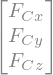

In [1]:
import sympy as sp
sp.init_printing()

L1,L2,p,d = sp.symbols("L1,L2,p,d")

F_Cx,F_Cy,F_Cz = sp.symbols("F_Cx,F_Cy,F_Cz") #az FC vektor komponensei

FC = sp.Matrix([F_Cx,F_Cy,F_Cz]) #definiáljuk az FC vektort, azaz 3x1-es mátrixot
#ha sorvektorra, azaz 1x3-as mátrixra lenne szükségünk, 
#akkor azt sp.Matrix([[F_Cx,F_Cy,F_Cz]])-ként csinálhatnánk meg (2 db [ és ] karakterrel)
FC

Megadjuk a feladatban szereplő adatokat, majd készítünk belőlük egy lisitát, aminek segítségével az összes adatot egyszerre tudjuk behelyettesíteni.

In [2]:
L1_adat = 3 #m
L2_adat = 2 #m
p_adat = 40 #N/m
d_adat = 30 #mm
FCx_adat = -150 #N
FCy_adat = 200 #N
FCz_adat = -50 #N

osszesadat = [(L1,L1_adat),(L2,L2_adat),(p,p_adat),(d,d_adat),(F_Cx,FCx_adat),(F_Cy,FCy_adat),(F_Cz,FCz_adat)]

## Az igénybevételek meghatározása
A befogási keresztmetszet súlypontjára redukált erő:
$$\mathbf{F}_\mathrm{{A}}=\mathbf{F}_\mathrm{{C}}+p L_2 (-\mathbf{j}),$$

ahol $\mathbf{j}$ az $y$ irányba mutató egységvektor:
$$\mathbf{j}=\left[\begin{matrix}0\\1\\0\end{matrix}\right].$$

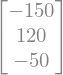

In [3]:
jV = sp.Matrix([0,1,0])
FA = FC+p*L2*(-jV)
FA.subs(osszesadat) #N

A befogási keresztmetszet súlypontjára redukált nyomaték:
$$\mathbf{M}_{\mathrm {A}}=\mathbf{r}_\mathrm{{AC}}\times \mathbf{F}_\mathrm{{C}}+\frac{1}{2}\left( \mathbf{r}_\mathrm{{AC}}+\mathbf{r}_\mathrm{{AB}}\right)\times \left(p L_2 (-\mathbf{j})\right),$$

ahol $\mathbf{r}_\mathrm{{AB}}$ és $\mathbf{r}_\mathrm{{AC}}$:
$$\mathbf{r}_\mathrm{{AB}}=\left[\begin{matrix}L_1\\0\\0\end{matrix}\right], \quad \mathbf{r}_\mathrm{{AC}}=\left[\begin{matrix}L_1\\0\\-L_2\end{matrix}\right].$$


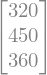

In [4]:
rAB = sp.Matrix([L1,0,0])
rAC = sp.Matrix([L1,0,-L2])

#vektoriális szorzat angolul: cross product
#Sympy-ban: 'vektor1.cross(vektor2)'
#Például: a 'sp.Matrix([1,0,0]).cross(sp.Matrix([0,1,0]))' utasítás 'sp.Matrix([0,0,1])'-t ad vissza
MA = rAC.cross(FC)+((rAB+rAC)/2).cross(p*L2*(-jV))
MA.subs(osszesadat) #Nm

A vizsgált keresztmetszet igénybevételei a lenti ábrán láthatóak. A nyilak jelölik az erők és nyomatékok értelmét, a hozzájuk tartozó értékek pedig az igénybevétel nagyságát.
<img src="Fig_1.25c.png" style="width: 400px;">
$\mathbf{F}_\mathrm{{A}}$ és $\mathbf{M}_\mathrm{{A}}$ alapján az igénybevételek nagysága az alábbi módon számítható:
$$N=-{F}_\mathrm{{Ax}}, \quad V_\mathrm{y}={F}_\mathrm{{Ay}}, \quad V_\mathrm{z}=-{F}_\mathrm{{Az}},$$
$$M_\mathrm{t}={M}_\mathrm{\mathrm{Ax}}, \quad M_{\mathrm{hy}}={M}_\mathrm{{Ay}}, \quad M_{\mathrm{hz}}={M}_\mathrm{{Az}}.$$

A programban a vektorok $x,y,z$ elemeit a `0,1,2` indexekkel tudjuk elérni.

In [5]:
N = -FA[0] #[0]: első elem: x
Vy = FA[1] #[1]: második elem: y
Vz = -FA[2] #[2]: harmadik elem: z

Mt = MA[0]
Mhy = MA[1]
Mhz = MA[2]

## Különböző terhelésekből származő feszültségek
Definiálnunk kell a keresztmetszeti jellemzőket. Innentől figyelnünk kell a mértékegységekre: eddig $\rm{m}$-ben számoltunk, de a keresztmetszet adatai $\rm{mm}$-ben adottak. Hogy majd $\rm{MPa}$-ban kapjuk a feszültségeket, áttérünk $\rm{mm}$-re.
$$A=\frac{d^2 \pi}{4},\quad I_{y}=I_{z}=\frac{d^4 \pi}{64},\quad I_\mathrm{p}=\frac{d^4 \pi}{32}, \quad K_{y}=K_{z}=\frac{d^3 \pi}{32}, \quad K_\mathrm{p}=\frac{d^3 \pi}{16}.$$

In [6]:
A  = d**2*sp.pi/4
Iy = d**4*sp.pi/64
Iz = Iy
Ip = d**4*sp.pi/32
Ky = d**3*sp.pi/32
Kz = Ky
Kp = d**3*sp.pi/16

A különféle igénybevételekből származó feszültségek megadása során használni fogjuk az $r=d/2$ jelölést, valamint a $\varrho$ koordinátát, mely az adott pont távolságát jelöli a keresztmetszet középpontjától. Ezeket, valamint az $y$ és $z$ koordinátákat definiálnunk kell a programban.

In [7]:
r = d/2
y,z,ϱ = sp.symbols("y,z,ϱ") #ϱ: \varrho + tab (a sima \rho + tab a ρ-t adja, ami eléggé hasonlít a p-re...)

Az $N$ normálerőből származó feszültség (negatív előjel: $x$ és $N$ ellentétes irányú):
$$\sigma_{x,N}=-\frac{N}{A}.$$

In [8]:
σxN = -N/A
σxN = σxN.subs(osszesadat).evalf(5) #behelyettesítjük az adatokat, numerikus kiértékelés 5 értékesjegyre
σxN #MPa

A $V_y$ nyíróerőből származó feszültség:
$$\tau_{xy,V_y}=\frac{4V_y}{3A} \left(1-\left(\frac{y}{r}\right)^2 \right).$$

In [9]:
τxyVy = 4*Vy/3/A*(1-(y/r)**2)
τxyVy = τxyVy.subs(osszesadat).evalf(5) #behelyettesítjük az adatokat, numerikus kiértékelés 5 értékesjegyre
τxyVy #MPa

A $V_z$ nyíróerőből származó feszültség (negatív előjel: $z$ és $V_z$ ellentétes irányú):
$$\tau_{xz,V_z}=-\frac{4V_z}{3A} \left(1-\left(\frac{z}{r}\right)^2 \right).$$

In [10]:
τxzVz = -4*Vz/3/A*(1-(z/r)**2)
τxzVz = τxzVz.subs(osszesadat).evalf(5) #behelyettesítjük az adatokat, numerikus kiértékelés 5 értékesjegyre
τxzVz #MPa

Az $M_\mathrm{t}$ nyomatékből származó feszültség ($\varrho$: a pont távolsága a keresztmetszet középpontjától):
$$\tau_{xt}=\frac{M_\mathrm{t}}{I_\mathrm{p}}\varrho.$$
Ennek a feszültségnek az iránya mindig merőleges a vizsgált pontba húzott sugárra.

<img src="Fig_1.25d.png" style="width: 400px;">

$\tau_{xt}$-t kifejezhetük az $y$ és $z$ koordináták segítségével. $\varrho=\sqrt{y^2+z^2}$. Ezek alapján:
$$\tau_{xt,y}=-\frac{M_t}{I_p}z,$$
$$\tau_{xt,z}=\frac{M_t}{I_p}y.$$
Ez a felírás teljesíti mind a feszültség nagyságára, mind az irányára vonatkozó követelményeket. Ez később, a számítások automatizálása során lesz számunkra hasznos felírás.

$M_\mathrm{t}$-t $\rm{Nmm}$-ben kell megadni!

In [11]:
τxt = 1000*Mt/Ip*ϱ
τxty = -1000*Mt/Ip*z
τxtz = 1000*Mt/Ip*y
τxt = τxt.subs(osszesadat).evalf(5)
τxty = τxty.subs(osszesadat).evalf(5) #behelyettesítjük az adatokat, numerikus kiértékelés 5 értékesjegyre
τxtz = τxtz.subs(osszesadat).evalf(5)
τxt #MPa

Az $M_{hy}$ nyomatékből származó feszültség:
$$\sigma_{x,M_{hy}}=\frac{M_{hy}}{I_y}z.$$
$M_{hy}$-t $\rm{Nmm}$-ben kell megadni!

In [12]:
σxMhy = 1000*Mhy/Iy*z
σxMhy = σxMhy.subs(osszesadat).evalf(5) #behelyettesítjük az adatokat, numerikus kiértékelés 5 értékesjegyre
σxMhy #MPa

Az $M_{hz}$ nyomatékből származó feszültség (negatív előjel: a kersztmetszet igénybevételeinek értelme alapján):
$$\sigma_{x,M_{hz}}=-\frac{M_{hz}}{I_z}y.$$
$M_{hz}$-t $\rm{Nmm}$-ben kell megadni!

In [13]:
σxMhz = -1000*Mhz/Iz*y
σxMhz = σxMhz.subs(osszesadat).evalf(5) #behelyettesítjük az adatokat, numerikus kiértékelés 5 értékesjegyre
σxMhz #MPa

## Ábrázolás

Mivel nagyságrendi különbség van az értékek között, mindegyiket külön ábrázoljuk.

Az ábrázoláshoz szükségünk lesz a `matplotlib` modulra és a `numpy` modulból a `linspace` függvényre. Elkészítjük az $y=-r\dotso r$, $z=-r\dotso r$ és $\varrho=0\dotso r$ adatsorokat. Ehhez $r$-et "gyári" Python `float`-tá kell alakítanunk, mert a `linspace` nem fogadja el a `sympy` által haszált `float`-ot.

Megjegyzés: mivel $y$ és $z$ értékei ugyanúgy $-r$-től $r$-ig kellenek nekünk, ezért defininálhatnánk egy közös adatsort nekik.

In [14]:
import matplotlib.pyplot as plt
from numpy import linspace

r_ertek = float(r.subs(osszesadat).evalf(5))

y_ertekek = linspace(-r_ertek,r_ertek,201) #felveszünk 201 pontot '-r' és 'r' között
z_ertekek = linspace(-r_ertek,r_ertek,201) #felveszünk 201 pontot '-r' és 'r' között
ϱ_ertekek = linspace(0,r_ertek,201) #felveszünk 201 pontot 0 és 'r' között

### $\tau_{xz,V_z}(z)$ ábrázolása, a feszültség minimuma és maximuma:

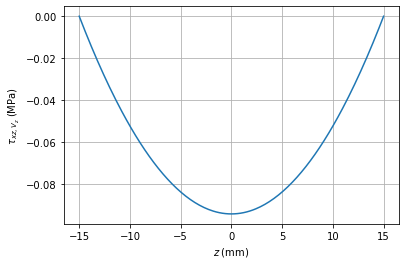

Minimum feszültség, maximum feszültség:


In [15]:
#behelyettesítjük 'z' értékeit, kiértékeljük a függvényt
τxz_ertekek = [τxzVz.subs(z,z_ert).evalf(5) for z_ert in z_ertekek]
plt.plot(z_ertekek,τxz_ertekek)
plt.grid() #rács
plt.xlabel(r"$z \; \rm{(mm)}$") #vízszintes tengely felirata, 'r' karakter az elejére a LaTeX kód miatt!
plt.ylabel(r"$\tau_{xz,V_z} \;\rm{(MPa)}$") #függőleges tengely felirata, 'r' karakter az elejére a LaTeX kód miatt!
plt.show() #kirajzolás

print("Minimum feszültség, maximum feszültség:") #kiíratunk egy magyarázó szöveget
#a display parancs a számokat 'szépen' írja ki, ha korábban meghívtuk az sp.init_printing()-et
display(min(τxz_ertekek),max(τxz_ertekek)) 

A számábrázolás pontatlanságából származó hibák miatt nem pontosan 0-t kapunk maximumnak.

A többi feszültség ábrázolását $\tau_{xz,V_z}(z)$ ábrázolásához nagyon hasonló módon kell megcsinálnunk. Amit módosítanunk kell a többi esetben, az a koordináta, a kiértékelendő függvény és a tengelyfeliratok. Ezt megoldhatnánk a fenti kód másolásával és kézi módosításával. Viszont ennél sokkal hatékonyabb, ha írunk rá egy saját függvényt.

Általában megéri saját függvényt írnunk, ha többször kell egy nagyon hasolnló utasítássorozatot kiadnunk. Jelen esetben az ábrázolás menete a következő lépésekből áll:
- függvény kiértékelése az adott helyeken,
- `plot` parancs,
- rács, tengelyfeliratok létrehozása,
- kirajzolás,
- minimum és maximum feszültség kiírása.

A Pythonban saját függvényt a `def fuggvenyneve(bemenet1,bemenet2,...):` szintaktikával definiálhatunk. A függvényhez tartozó utasításokat egy tabulátornyival (vagy 4 szóköznyivel) beljebb írjuk, azaz indentáljuk. Ha a függvényünknek valamilyen értéket, eredményt, stb.-t kell visszaadnia, azt a `return eredmeny` paranccsal érhetjük el. Ezt tudjuk hozzárendelni egy változóhoz,  például `valtozo=szamolas(adatok)` parancsra a `valtozo`-ba a `szamolas` függvény visszatérési értéke kerül. Most nem lesz szükségünk a `return` parancsra, mert csak ábrázolni szeretnénk az eredményeket.

In [16]:
def abrazolas(koordinatak, kifejezes, xfelirat, yfelirat):
    #'koordinatak': azok a koordináta értékek, ahol ki akarjuk majd értékelni a feszülségeket
    #'kifejezes': amibe a 'koordinatak'-at behelyettesítjük
    #'xfelirat': vízszintes tengely felirata, LaTeX kód esetén kell az elejére az r karakter!
    #'yfelirat': függőleges tengely felirata, LaTeX kód esetén kell az elejére az r karakter!
        
    #függvény kiértékelése:
    #nem tudjuk előre, hogy 'y', 'z' és 'ϱ' közül melyik szerepel a kifejezésben,
    #ezért mind a 3 szimbólumba behelyettesítünk
    #most nem írhatunk listát, hogy egyszerre helyettesíthessünk be, mert 'list comprehesion'-ön belül leszünk
    #ezért egyesével kell behelyettesítenünk, a '.subs()' parancs többszöri kiadásával
    fesz_ertekek=[kifejezes.subs([(y,ertek),(z,ertek),(ϱ,ertek)]) for ertek in koordinatak]    
    plt.plot(koordinatak,fesz_ertekek)
    plt.grid() #rács
    plt.xlabel(xfelirat) #vízszintes tengely feliratának létrehozása
    plt.ylabel(yfelirat) #függőleges tengely feliratának létrehozása
    plt.show() #kirajzolás
    print("Minimum feszültség, maximum feszültség MPa-ban:") #kiíratunk egy magyarázó szöveget
    display(min(fesz_ertekek),max(fesz_ertekek)) #visszatérési érték: min. és max. feszültség

$\tau_{xz,V_z}(z)$-t ábrázoljuk a saját függvénnyel:

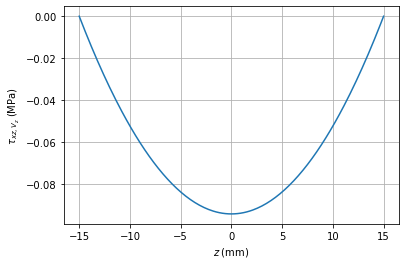

Minimum feszültség, maximum feszültség MPa-ban:


In [17]:
abrazolas(z_ertekek,τxzVz,r"$z \; \rm{(mm)}$",r"$\tau_{xz,V_z} \;\rm{(MPa)}$")

### $\sigma_{x,M_{hy}}(z)$ ábrázolása:

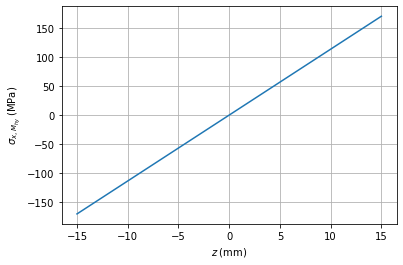

Minimum feszültség, maximum feszültség MPa-ban:


In [18]:
abrazolas(z_ertekek,σxMhy,r"$z \; \rm{(mm)}$",r"$\sigma_{x,M_{hy}} \;\rm{(MPa)}$")

### $\sigma_{x,N}$ ábrázolása:

$\sigma_{x,N}$ az egész keresztmetszeten konstans értékű, így bármelyik koordináta függvényében ábrázolhatnánk.

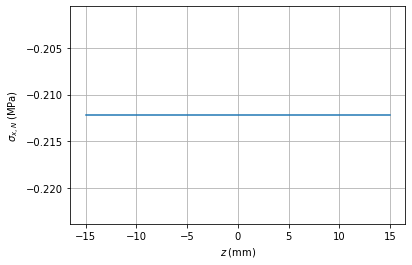

Minimum feszültség, maximum feszültség MPa-ban:


In [19]:
abrazolas(z_ertekek,σxN,r"$z \; \rm{(mm)}$",r"$\sigma_{x,N} \;\rm{(MPa)}$")

### $\tau_{xt}(\varrho)$ ábrázolása:

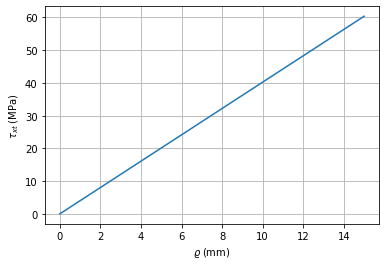

Minimum feszültség, maximum feszültség MPa-ban:


In [20]:
abrazolas(ϱ_ertekek,τxt,r"$\varrho \; \rm{(mm)}$",r"$\tau_{xt}\;\rm{(MPa)}$")

### $\sigma_{x,M_{hz}}(y)$ ábrázolása:

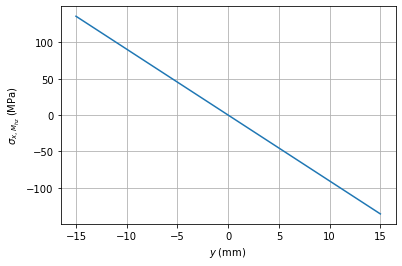

Minimum feszültség, maximum feszültség MPa-ban:


In [21]:
abrazolas(y_ertekek,σxMhz,r"$y \; \rm{(mm)}$",r"$\sigma_{x,M_{hz}} \;\rm{(MPa)}$")

### $\tau_{xy,V_y}(y)$ ábrázolása:

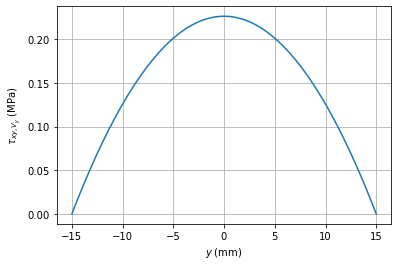

Minimum feszültség, maximum feszültség MPa-ban:


In [22]:
abrazolas(y_ertekek,τxyVy,r"$y \; \rm{(mm)}$",r"$\tau_{xy,V_y} \;\rm{(MPa)}$")

## Kijelölt pontok vizsgálata

<img src="Fig_1.25b.png" style="width: 400px;">

A feszültségtenzor elemei:
$$\boldsymbol{\sigma}=\left[\begin{matrix} \sigma_x & \tau_{xy} & \tau_{xz}\\ \tau_{yx} & \sigma_y & \tau_{yz}\\ \tau_{zx} & \tau_{zy} & \sigma_z \end{matrix}\right].$$

A mi esetünkben $\sigma_{y}=\sigma_{z}=\tau_{yz}=\tau_{zy}=0$, valamint $\sigma_x=\sigma_{x,N}+\sigma_{x,M_{hy}}(z)+\sigma_{x,M_{hz}}(y)$.

Definiáljuk az ennek megfelelő mátrixot szimbolikusan, amihez szükségünk lesz az egyes elemek szimbólumaira. Ennek során kihasználjuk, hogy a tenzor szimmetrikus és néhány eleméről tudjuk, hogy 0 lesz. Hogy elkerüljük az ütközést a korábbi változónevekkel, a `_TE` (mint Tenzor Elem) utótagot fogjuk használni. A $\sigma_x$-re fentebb leírt kifejezést is definiáljuk, mert $\sigma_x$ minden pontban így számolható.

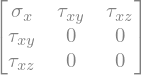

In [23]:
σx,τxy,τxz = sp.symbols(r"\sigma_{x},\tau_{xy},\tau_{xz}") #'r' karakter kell a srting elé a LaTeX kód miatt
σx_eredo = σxN+σxMhy+σxMhz
σMx = sp.Matrix([[σx,τxy,τxz],[τxy,0,0],[τxz,0,0]])
σMx

### P1 pont

A pont $(y,z,\varrho)$ koordinátái:
$$y_{\mathrm{P1}}=-r, \quad z_{\mathrm{P1}}=0, \quad \varrho_{\mathrm{P1}}=r.$$

Ebben a pontban a $\tau_{xt}$ feszültség a $-z$ irányba mutat. Ennek megfelelően $\tau_{xz}$-hez adjuk hozzá, negatív előjellel.

Korábban láthattuk, hogy a számábrázolási pontatlanság miatt azok az értékekre, melyeknek 0-nak kellett volna lennie (a keresztmetszet szabad szélén nem lehet 0-tól eltérő a nyíróerőből adódó feszültség), kicsi, de nem 0 számokat kaptunk. Ezeket a `round(n)` utasítással tudjuk kerekíteni, `n` tizedesjegyre. Ebben az esetben például a `round(5)` megfelelő eredményt ad.

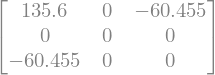

In [24]:
yP1 = -r_ertek
zP1 = 0
ϱ_ertekP1 = r_ertek
σxP1 = σx_eredo.subs([(y,yP1),(z,zP1)]).round(5) #behelyettesítjük a koordinátákat, 5 tizedesjegyre kerekítünk
τxyP1 = τxyVy.subs([(y,yP1),(z,zP1)]).round(5) #behelyettesítjük a koordinátákat, 5 tizedesjegyre kerekítünk
τxzP1 = (τxzVz+(-τxt)).subs([(y,yP1),(z,zP1),(ϱ,ϱ_ertekP1)]).round(5) #itt 'ϱ'-ra is szükség van, 5 tizedesjegyre kerekítünk
σMxP1 = σMx.subs([(σx,σxP1),(τxy,τxyP1),(τxz,τxzP1)]) #beírjuk a mátrixba a 'P1'-re  számolt értékeket
σMxP1.evalf(5) #5 értékesjegyre írjuk ki

Ezt a műveletsort végig kell csinálni az összes pontra. Emiatt ismét célszerű egy sajár függvényt definiálnunk, ami az $y$ és $z$ koordináták függvénynében visszatér a feszültségtenzorral. $\tau_{xy}$ és $\tau_{xz}$ esetén $\tau_{xt}(\varrho)$ helyett $\tau_{xt,y}(y,z)$-t és $\tau_{xt,z}(y,z)$-t használjuk. Így $\tau_{xy}=\tau_{xy}(y)+\tau_{xt,y}(y,z)$, valamint $\tau_{xz}=\tau_{xz}(z)+\tau_{xt,z}(y,z)$. Így $\varrho$ nem szerepel a képletekben, és a feszültség iránya automatikusan kiadódik.

In [25]:
τxy_eredo=τxyVy+τxty
τxz_eredo=τxzVz+τxtz

def σMatrix(P):
    #'yP': a pont 'y' koordinátája
    #'zP': a pont 'z' koordinátája
    yP, zP = P
    koord_ertekek = [(y,yP),(z,zP)] #készítünk egy listát, hogy egyszerre tudjuk behelyettesíteni a koordinátákat
    σxP = σx_eredo.subs(koord_ertekek).round(5) #behelyettesítjük a koorbinátákat, 5 tizedesjegyre kerekítünk
    τxyP = τxy_eredo.subs(koord_ertekek).round(5)
    τxzP = τxz_eredo.subs(koord_ertekek).round(5)
    σMxP = σMx.subs([(σx,σxP),(τxy,τxyP),(τxz,τxzP)])
    return σMxP.evalf(5)

A P1-hez tartozó feszültségtenzort kiszámolhatjuk a saját függvénnyel:

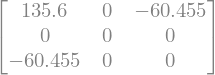

In [26]:
P1 = [-r_ertek,0]
σMatrix(P1)

### P2 pont

A pont $(y,z)$ koordinátái:
$$y_{P1}=0, \quad z_{P1}=-r.$$

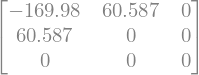

In [27]:
P2 = [0,-r_ertek]
σMatrix(P2)

### P3 pont

A pont $(y,z)$ koordinátái:
$$y_{P1}=r, \quad z_{P1}=0.$$

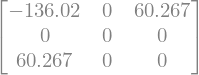

In [28]:
P3 = [r_ertek,0]
σMatrix(P3)

### P4 pont

A pont $(y,z)$ koordinátái:
$$y_{P1}=0, \quad z_{P1}=r.$$

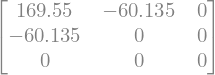

In [29]:
P4 = [0,r_ertek]
σMatrix(P4)

### P5 pont

A pont $(y,z)$ koordinátái:
$$y_{P5}=0, \quad z_{P5}=0.$$

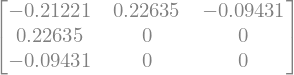

In [30]:
P5 = [0,0]
σMatrix(P5)

Mind az feszültségek ábrázolásának, mind különböző pontok példáján jól látható, hogy célszerű saját függvény írni a kód másolgatása és kézi szerkesztése helyett. Fontos előny az is, hogy ha egységesen módosítani szeretnénk például az összes ábra formázását, akkor elég egy helyen átírni a kódot. Ez a programhibák javítását is nagyban megkönnyíti.